## Undersöker ett dataset kring löner inom data science


### Första steget:
- importera nödvändiga biblotek
- ta in datan i en dataframe

In [6]:
# Importer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
# Läs in datan
df = pd.read_csv("data/ds_salaries.csv")

### Nästa steg:
- Inpektera datan:info, statistik, null-värden mm
- Gör lämplig förbearbetning / preprocessing

In [22]:
# Kollar dataframens mönster
df.shape

(3755, 11)

In [221]:
# Kollar första 10 raderna i dataframen
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,412000,19,412000,75,100,70,0
3751,2021,2,2,84,151000,19,151000,75,100,70,0
3752,2020,0,2,47,105000,19,105000,75,100,70,2
3753,2020,0,0,17,100000,19,100000,75,100,70,0


In [51]:
# se mängden numeriska och kategoriska värden
num_cols = df.select_dtypes(exclude=['object']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print(f'numeriska: {len(num_cols)}, kategoriska: {len(cat_cols)}')

numeriska: 4, kategoriska: 7


Noterar:
- Antalet numeriska columner är 4
- Antalet kategoriska columner är 7

In [52]:
 # Kollar generell info om datan, så som null-värden, Dtype etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [53]:
# Kollar på datans statistik
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [58]:
# Tar fram och kollar mängden null-värden

# För var och en column
print(df.isnull().sum())

# För alla columner
print(f'\n Dataframe: {df.isnull().sum().sum()}')

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

 Dataframe: 0


Noterar:
- Det finns inga null-värden att hantera

### Nästa steg: Visualisering

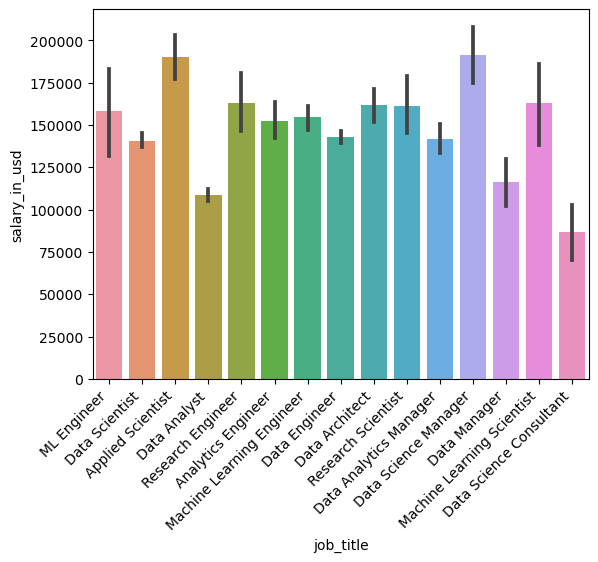

In [191]:
# Jämför 15 toppantal jobb titlar och lön

df_copy = df.copy()

top_categories = df_copy['job_title'].value_counts().nlargest(15).index.tolist()
top_category_rows = df_copy[df_copy['job_title'].isin(top_categories)]

sns.barplot(x="job_title", y="salary_in_usd", data=top_category_rows)

plt.xticks(rotation=45, ha='right')

plt.show()

Noterar:
- Efter att jämföra lön i USD med jobb titlar kan man se att lön för Applied Scientist och Data Manager hamnar högst och jämt 
- Jag jämför de 15 jobb som det finns mest av i datasetet, för att inte klumpa ihop förmycket och för att det fanns vissa titlar med lite antal i datasetet

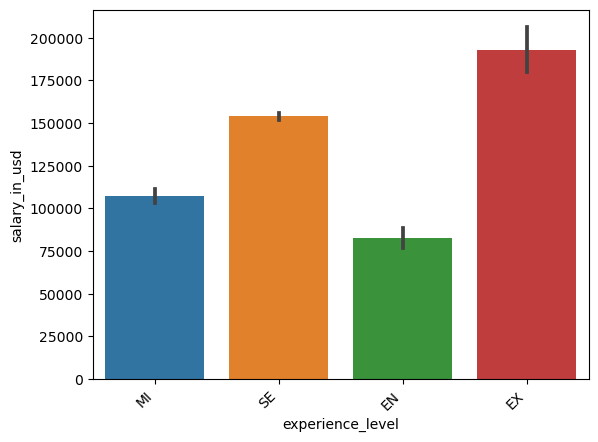

In [192]:
# Jämför erfarenhetsnivåb och lön

sns.barplot(x="experience_level", y="salary_in_usd", data=top_category_rows)

plt.xticks(rotation=45, ha='right')

plt.show()

Noterar:
- Ex/Executive-level tjänar mest. Där efter följer SE/Senior-level, MI/Mid-level och minst EN/Entry-level

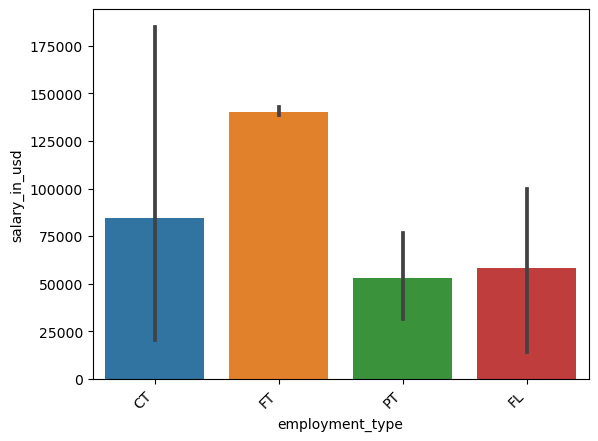

In [193]:
# Jämför anställnings typ och lön


top_category_rows['employment_type'] = top_category_rows['employment_type'].replace('FT','Full-Time')
top_category_rows['employment_type'] = top_category_rows['employment_type'].replace('CT','Contract')
top_category_rows['employment_type'] = top_category_rows['employment_type'].replace('FL','Freelance')
top_category_rows['employment_type'] = top_category_rows['employment_type'].replace('PT','Part-Time')

sns.barplot(x="employment_type", y="salary_in_usd", data=top_category_rows)

plt.xticks(rotation=45, ha='right')

plt.show()

Noterar:
- FT/Full-Time tjänar mest. Där efter följer CT/Contract, FL/Freelance och minst PT/Part-Time

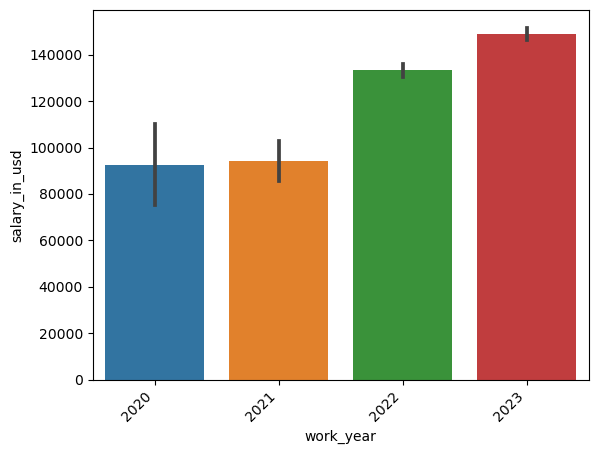

In [175]:
# Jämför arbetsår och lön

sns.barplot(x="work_year", y="salary_in_usd", data=top_category_rows)

plt.xticks(rotation=45, ha='right')

plt.show()

Noterar:
- Tjänar bäst 2023
- Lönen steg med åren, vilket jag tänker vissar tillväxten inom området: data science 

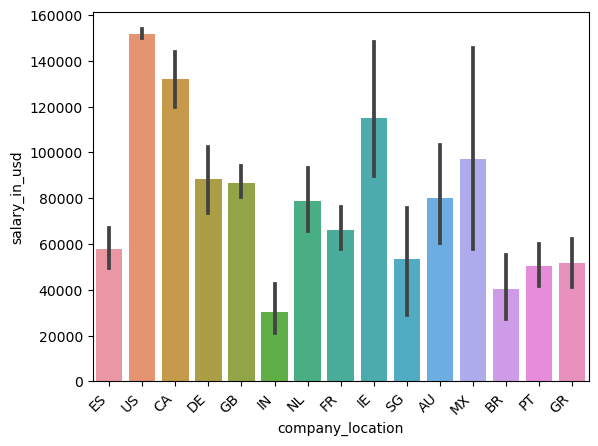

In [177]:
# Jämför företagsplats och lön
# Jämför top 15 länder

top_categories = df['company_location'].value_counts().nlargest(15).index.tolist()
top_category_rows = df[df['company_location'].isin(top_categories)]

sns.barplot(x="company_location", y="salary_in_usd", data=top_category_rows)

plt.xticks(rotation=45, ha='right')

plt.show()

Noterar:
- Av top 15 företagsplatser tjänar man mest i är USA, strax följt av Canada

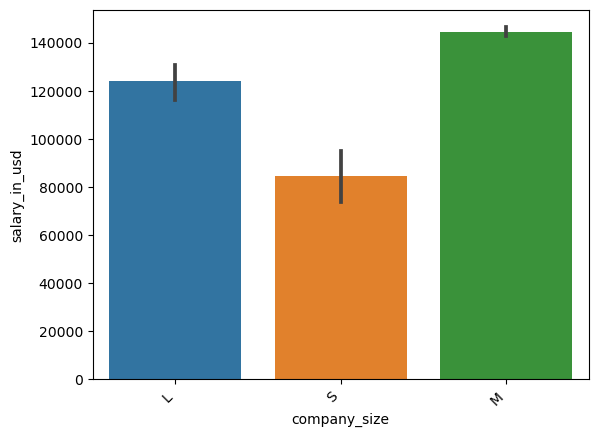

In [178]:
# Jämför top 15 arbetsår och lön

sns.barplot(x="company_size", y="salary_in_usd", data=top_category_rows)

plt.xticks(rotation=45, ha='right')

plt.show()

Noterar:
- Det ser ut som att man kännar bättre i medelstora företag 

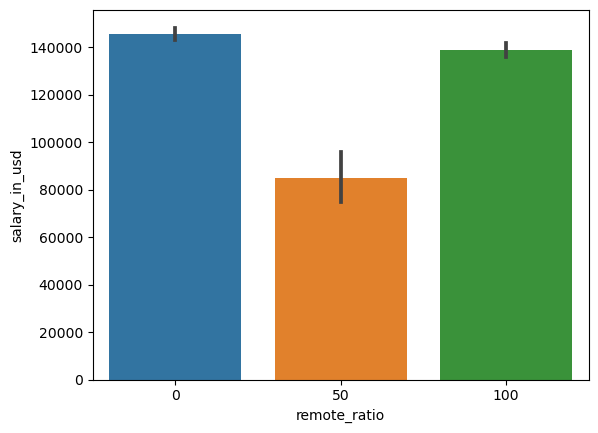

In [179]:
sns.barplot(x="remote_ratio", y="salary_in_usd", data=top_category_rows)

plt.show()

Noterar:
- Märkligt och intressant att se att man tjänar mer om man är remote 0% eller 100% än 50%.

<Axes: >

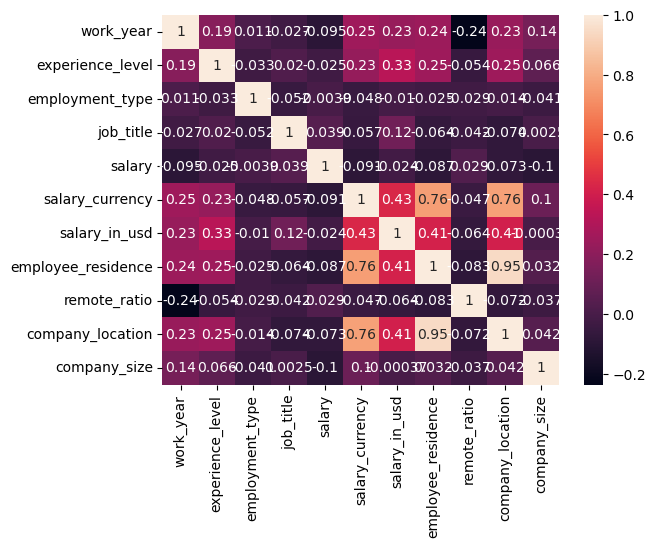

In [220]:
# Kollar korrelationen mellan alla features
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

top_categories = df_copy['job_title'].value_counts().nlargest(15).index.tolist()
top_rows = df_copy[df_copy['job_title'].isin(top_categories)]

def encode_categorical(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']):
        df[col] = le.fit_transform(df[col])
    return df

df_encoded = encode_categorical(df)

corr_matrix = df_encoded.corr()

sns.heatmap(corr_matrix, annot=True)



In [217]:
corr_matrix['salary_in_usd'].nlargest(5)

salary_in_usd         1.000000
salary_currency       0.430450
employee_residence    0.414039
company_location      0.405183
experience_level      0.327173
Name: salary_in_usd, dtype: float64

Noterar:
- Största korrelationerna, undantag features som jämför sig själva och blir 1,  är salary_currency mot company_location och salary_currency mot employee_residence. Vilket man kan tänka sig, att valuta och vart man bor eller vart företaget finns korrelerar.

- Näst störst är lön i USD mot company_location och lön i USD mot employee_residence

#

In [223]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Rapport till EDA-Projekt

### Introduction

Det dataset jag valt att använda är ett om löner inom data science. Datasetet innehåller kolumner för följande: arbetsår, erfarenhetsnivå, anställnings typ, jobbtitel, lön, valuta, lön i USD, vart de anställda bor, vart företaget ligger, förhållandet mellan distansarbete, vart företaget ligger och hur stort är företaget.

### Data cleaning and preprocessing

Efter att ha undersökt datasetet uptäckte jag att det inte fanns några null-värden och behövde inte göra något.

### Exploratory data analysis

Jag hade vissa förutsägningar för hur det skulle se ut efter att ha jämfört och analyserat de features som fanns. Det första exemplet är jämförandet mellan jobbtitel och lön i USD, där Applied Scientist och Data Manager tjänade mest, vilket jag inte kunde ana. 

Det fanns vissa som var som jag hade trot som att den med bättre expertis tjänade mer och att den som hade Full-Time tjänade mest, också att man tjänade mest i USA och Canda kunde jag tänka mig.

Jag tyckte att det fanns vissa andra intressanta och coola resultat så som att man tjänar mer om man är remote 0% eller 100% än 50%, att man tjänar mer i ett mediumstort företag än ett stort eller att se hur man börjar tjänar mer med åren inom detta området.

Också intressant att se att vart de anställda bor och lönen i USD hade hög korrelation, samma med företagsplatser och lönen i USD. 

### Conclusion

Sammanfattat av det har jag fått att platsen verkar ha betydelse på lön inom detta område, data science har haft stor tillväxt senaste åren och att mina förusättningar var både rätt och fel.